<a href="https://colab.research.google.com/github/Jaeek27/Data-Science-Projects/blob/main/Clustering_DK_IncomeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
customers_df = pd.read_csv( "/content/Income Data.csv" )

In [ ]:
customers_df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


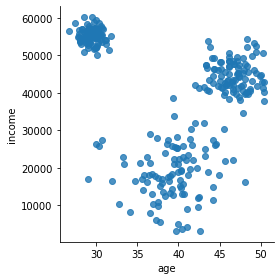

In [ ]:
# Scatter Plot between income and age 
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );


In [ ]:
# K Means Clustering 
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_df )

KMeans(n_clusters=3)

In [ ]:
customers_df["clusterid"] = clusters.labels_

In [ ]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


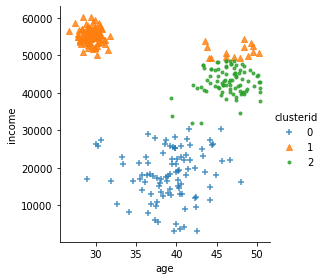

In [ ]:
# Plotting customers with their segments 
markers = ['+','^','.']
sn.lmplot( "age", "income", 
          data=customers_df, 
          hue = "clusterid", 
          fit_reg=False, 
          markers = markers,
          size = 4 );

In [ ]:
# Normalizing Features   # Explain relevance of this . page 250 
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform( 
    customers_df[["age", "income"]] )

In [ ]:
# Fit K Means again 
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


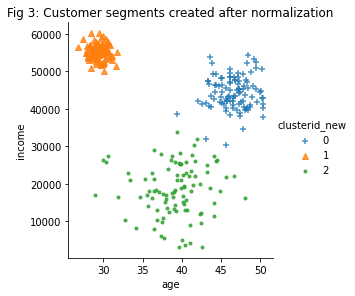

In [ ]:
markers = ['+','^','.']
sn.lmplot( "age", "income", 
          data=customers_df, 
          hue = "clusterid_new", 
          fit_reg=False, 
          markers = markers,
          size = 4 );
plt.title( "Fig 3: Customer segments created after normalization");

In [ ]:
clusters.cluster_centers_

array([[1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01],
       [4.30539326e+04, 4.64191011e+01]])

In [ ]:
# Cluster Center and Interpreting the Clusters 
customers_df.groupby( 'clusterid' )['age', 'income'].agg( ["mean",'std'] ).reset_index()

<ipython-input-18-74e8b6740cd0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customers_df.groupby( 'clusterid' )['age', 'income'].agg( ["mean",'std'] ).reset_index()


clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  31.700435  6.122122  54675.652174  2362.224320
2         2  46.419101  2.289620  43053.932584  3613.769632

The clusters can be interpreted as follows:
1. cluster1: Customers with mean age of 31 and income of 54k. Low age and high income.
2. cluster0: Customers with mean age of 39 and income of 18K. Mid age and low income.
3. cluster2: Customers with mean age of 46 and income of 43k. High age and medium income

In [ ]:
## PRODUCT SEGMENTATION 

A company would like to enter the market with a new beer brand. Before, it decides the kind of beer it will launch, it must understand what kinds of products already exist in the market and what kinds of segments the products address.

In [ ]:
beer_df = pd.read_csv( '/content/beer.csv' )

In [ ]:
beer_df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [ ]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [ ]:
# Normalizing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 'sodium','alcohol','cost']])
                                              

In [ ]:
# Finding no of clusters . As there are more than 2 variables, different methods need to be used 
# Dendogram , Elbow Method 

DENDOGRAM
A dendrogram is a cluster tree diagram which groups those entities together that are nearer to each other. A dendrogram can be drawn using the clustermap() method in seaborn.

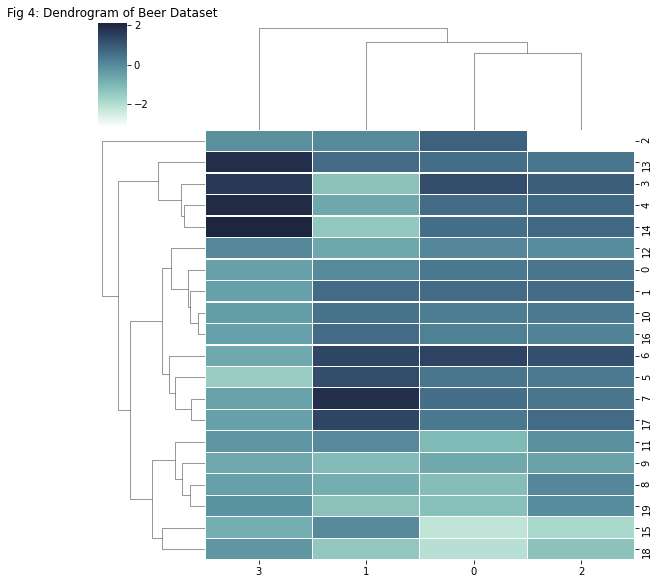

In [ ]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2, 
              figsize = (8,8) );
plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
beer_df.iloc[[10, 16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [ ]:
beer_df.iloc[[2,18]]


,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


In [ ]:
# ELBOW CURVE METHOD , page 255

v

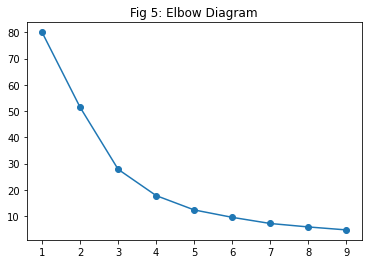

In [ ]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig 5: Elbow Diagram");

In [ ]:
# Normalizing 
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']])

                                                

In [ ]:
# Creating Clusters 
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [ ]:
# Interpreting Clusters 
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [ ]:
# In cluster 0, beers with medium alcohol content and medium cost are grouped together. This is the largest segment and may be targeting the largest segment of customers.

In [ ]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [ ]:
# In cluster 1, all the light beers with low calories and sodium content are clustered into one group. This
# must be addressing the customer segment who wants to drink but are also calorie conscious.

In [ ]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [ ]:
# These are expensive beers with relatively high alcohol content. Also, the sodium content is low. The costs
# are high because the target customers could be brand sensitive and the brands are promoted as premium
# brands.

Hierarchical clustering is a clustering algorithm which uses the following steps to develop clusters:
1. Start with each data point in a single cluster.
2. Find the data points with the shortest distance (using an appropriate distance measure) and
merge them to form a cluster.
3. Repeat step 2 until all data points are merged together to form a single cluster.

agglomerative hierarchical cluster.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [ ]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,1,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [ ]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [ ]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2
